In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import base64
from io import BytesIO
import tensorflow as tf
from PIL import ImageOps

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

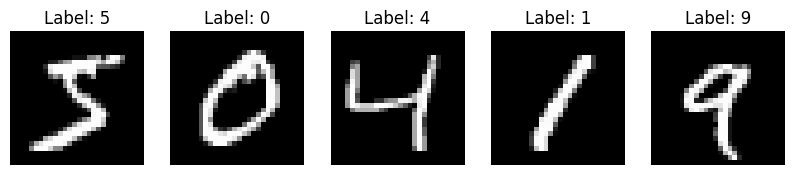

In [15]:
num_images = 5
images = X_train[:num_images]

plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [16]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
X_train = np.concatenate((X_train,X_test))
y_train = np.concatenate((y_train,y_test))

In [20]:
model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test),validation_split=0.2)

Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9072 - loss: 0.2917 - val_accuracy: 0.9867 - val_loss: 0.0403
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9818 - loss: 0.0601 - val_accuracy: 0.9924 - val_loss: 0.0216
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9868 - loss: 0.0439 - val_accuracy: 0.9957 - val_loss: 0.0119
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9964 - val_loss: 0.0113
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9964 - val_loss: 0.0092
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0223 - val_accuracy: 0.9967 - val_loss: 0.0078
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0191 - val_accuracy: 0.9979 - val_loss: 0.0063
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.01

In [21]:
model.save('my_model.keras')

In [22]:
model = tf.keras.models.load_model('/content/my_model.keras')

In [23]:
def preprocess_image(image_data):
    image_data = image_data.split(",")[1]
    image = Image.open(BytesIO(base64.b64decode(image_data))).convert('L')
    plt.imshow(image, cmap='gray')
    plt.title("Original Captured Image")
    plt.axis('off')
    plt.show()
    image = image.resize((28, 28))
    image = ImageOps.invert(image)
    image = np.array(image).astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)

    return image

def predict_digit(image_data):
    image = preprocess_image(image_data)
    prediction = model.predict(image)
    print(f"Prediction Probabilities: {prediction}")

    predicted_digit = np.argmax(prediction)
    print(f"Predicted Digit: {predicted_digit}")

from google.colab import output
output.register_callback('notebook.predict_digit', predict_digit)


HTML(value='\n<canvas id="canvas" width=256 height=256 style="border:1px solid #000000;"></canvas>\n<br>\n<but…

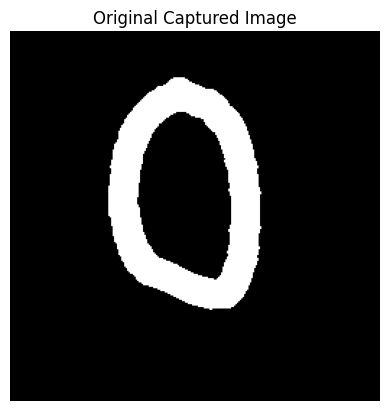

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction Probabilities: [[3.5002250e-09 3.0517550e-14 2.0442708e-12 5.5328342e-06 1.0422064e-10
  1.2543127e-13 1.2105415e-23 7.6127242e-07 4.9419126e-16 9.9999368e-01]]
Predicted Digit: 9


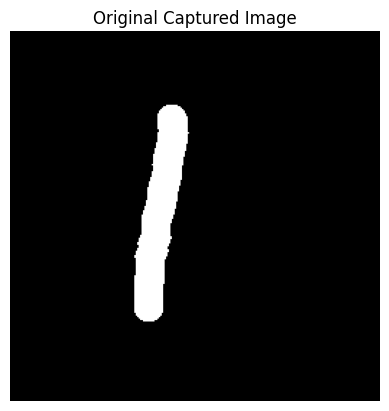

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction Probabilities: [[2.5656546e-10 1.0000000e+00 2.1282129e-09 1.0402877e-15 3.5251116e-12
  3.8489533e-15 5.0342766e-08 1.5801433e-08 6.5050093e-10 6.8188614e-16]]
Predicted Digit: 1


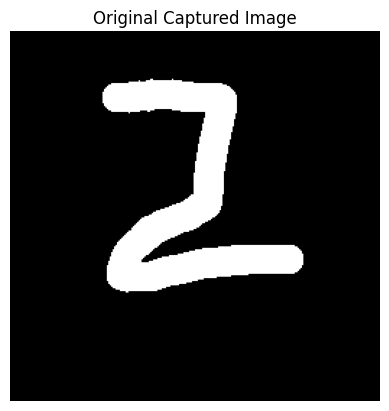

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction Probabilities: [[1.4372893e-13 1.0050752e-13 9.9980855e-01 1.8031904e-10 9.7934036e-11
  1.0040296e-27 3.2354423e-25 1.9142838e-04 1.9284346e-12 3.5548219e-17]]
Predicted Digit: 2


In [25]:
canvas_html = """
<canvas id="canvas" width=256 height=256 style="border:1px solid #000000;"></canvas>
<br>
<button onclick="clearCanvas()">Clear</button>
<button onclick="predictDigit()">Predict</button>
<script>
var canvas = document.getElementById('canvas');
var ctx = canvas.getContext('2d');
var drawing = false;

canvas.addEventListener('mousedown', function(e) {
    drawing = true;
    draw(e);
});

canvas.addEventListener('mousemove', function(e) {
    if (drawing) {
        draw(e);
    }
});

canvas.addEventListener('mouseup', function() {
    drawing = false;
    ctx.beginPath();
});

canvas.addEventListener('mouseleave', function() {
    drawing = false;
    ctx.beginPath();
});

function draw(e) {
    ctx.lineWidth = 20;  // Increase line width for better visibility
    ctx.lineCap = 'round';
    ctx.strokeStyle = 'white';  // Ensure the stroke color is white (if the background is black)
    ctx.lineTo(e.clientX - canvas.getBoundingClientRect().left, e.clientY - canvas.getBoundingClientRect().top);
    ctx.stroke();
    ctx.beginPath();
    ctx.moveTo(e.clientX - canvas.getBoundingClientRect().left, e.clientY - canvas.getBoundingClientRect().top);
}

function clearCanvas() {
    ctx.clearRect(0, 0, canvas.width, canvas.height);
}


function predictDigit() {
    var dataURL = canvas.toDataURL('image/png');
    var img = new Image();
    img.src = dataURL;
    img.onload = function() {
        // Convert image to base64
        var canvas2 = document.createElement('canvas');
        canvas2.width = img.width;
        canvas2.height = img.height;
        var ctx2 = canvas2.getContext('2d');
        ctx2.drawImage(img, 0, 0);
        var imageData = canvas2.toDataURL('image/png');
        google.colab.kernel.invokeFunction('notebook.predict_digit', [imageData], {});
    };
}
</script>
"""
display(widgets.HTML(canvas_html))